In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV

# Model
from sklearn.tree import DecisionTreeClassifier

# For reproducible results
RANDOM_STATE_SEED = 732

In [50]:
df_dataset = pd.read_csv(".\datasets\processed_dataset.csv")
df_dataset


,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364013,25,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364014,37,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1
1364015,112640543,3,0,0,0.0,0,0,0.000000,0.000000,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0,0
1364016,41,1,1,0,0.0,0,0,0.000000,0.000000,0,...,40,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [30]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isfinite(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
True


326

In [31]:
# df_dataset.isinf()
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dataset.dropna(inplace=True)


In [32]:
# es realmente necesario volver a filtrar los datos si supuestamente el procesado no deveria tener valores infinitos

print(np.any(np.isnan(df_dataset)))
print(np.any(np.isinf(df_dataset)))

# si trato de usar where infinite, normalmente trae malos resultados onda overflow de memoria
df_dataset.isin([np.inf, -np.inf]).values.sum()

False
False


0

In [33]:
df_dataset.describe()
# df_label = np.array(df_dataset.pop('Label'))
# df_label

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,...,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06,1.363855e+06
mean,1.070349e+07,6.072115e+00,6.489306e+00,6.098199e+02,4.197570e+03,4.697023e+02,4.712587e+00,1.034416e+02,1.995422e+02,3.936756e+02,...,2.368538e+01,9.466429e+04,4.715669e+04,1.466301e+05,6.396847e+04,4.268428e+06,8.187201e+04,4.331958e+06,4.188292e+06,2.126978e-01
std,2.678343e+07,7.805482e+01,1.867299e+02,1.902481e+03,2.708463e+05,3.922906e+02,1.661050e+01,7.652423e+01,1.731750e+02,4.337688e+02,...,8.299167e+00,1.827324e+06,1.106640e+06,2.422783e+06,1.543507e+06,1.608958e+07,1.283477e+06,1.622071e+07,1.602047e+07,4.092158e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.160000e+04,3.000000e+00,1.000000e+00,4.500000e+01,1.020000e+02,3.900000e+01,0.000000e+00,3.200000e+01,0.000000e+00,9.200000e+01,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.859909e+06,5.000000e+00,3.000000e+00,5.090000e+02,3.210000e+02,3.480000e+02,0.000000e+00,1.086667e+02,1.882162e+02,3.130000e+02,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.406174e+06,5.000000e+00,4.000000e+00,9.350000e+02,4.880000e+02,9.350000e+02,0.000000e+00,1.870000e+02,4.181447e+02,3.850000e+02,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,4.315900e+04,6.924100e+04,1.100627e+06,1.010000e+08,2.912000e+03,1.460000e+03,1.460000e+03,1.032376e+03,8.688000e+03,...,4.400000e+01,1.110000e+08,7.490000e+07,1.110000e+08,1.110000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08,1.000000e+00


In [34]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363855 entries, 0 to 1364017
Data columns (total 77 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1363855 non-null  int64  
 1   Tot Fwd Pkts       1363855 non-null  int64  
 2   Tot Bwd Pkts       1363855 non-null  int64  
 3   TotLen Fwd Pkts    1363855 non-null  int64  
 4   TotLen Bwd Pkts    1363855 non-null  float64
 5   Fwd Pkt Len Max    1363855 non-null  int64  
 6   Fwd Pkt Len Min    1363855 non-null  int64  
 7   Fwd Pkt Len Mean   1363855 non-null  float64
 8   Fwd Pkt Len Std    1363855 non-null  float64
 9   Bwd Pkt Len Max    1363855 non-null  int64  
 10  Bwd Pkt Len Min    1363855 non-null  int64  
 11  Bwd Pkt Len Mean   1363855 non-null  float64
 12  Bwd Pkt Len Std    1363855 non-null  float64
 13  Flow Byts/s        1363855 non-null  float64
 14  Flow Pkts/s        1363855 non-null  float64
 15  Flow IAT Mean      1363855 non-n

In [35]:
y = np.array(df_dataset.pop('Label'))
X = np.array(df_dataset)

In [36]:
print(X.shape)
print(y.shape)

(1363855, 76)
(1363855,)


In [37]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,141385.0,9.0,7.0,553.0,3773.0,202.0,0.0,61.444444,87.534438,1460.0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,281.0,2.0,1.0,38.0,0.0,38.0,0.0,19.000000,26.870058,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,279824.0,11.0,15.0,1086.0,10527.0,385.0,0.0,98.727273,129.392497,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,132.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,274016.0,9.0,13.0,1285.0,6141.0,517.0,0.0,142.777778,183.887722,1460.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363850,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1363851,37.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1363852,112640543.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,56300000.0,7.778175,56300000.0,56300000.0
1363853,41.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [38]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1363850,1
1363851,1
1363852,0
1363853,1


In [39]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
pd.DataFrame(X_scaler.transform(X))
X = np.array(X_scaler.transform(X))
X

array([[1.17820004e-03, 1.85365402e-04, 1.01096171e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33333341e-06, 2.31706752e-05, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.33185841e-03, 2.31706752e-04, 2.16634653e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.38671215e-01, 4.63413504e-05, 0.00000000e+00, ...,
        1.02479244e-07, 4.69166667e-01, 4.69166667e-01],
       [3.33333344e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.91666676e-07, 0.00000000e+00, 1.44423102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [40]:
# X, y = train_test_split(df_dataset, test_size=0.3, random_state=RANDOM_STATE_SEED)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=RANDOM_STATE_SEED)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(913782, 76)
(913782,)
(450073, 76)
(450073,)


In [ ]:
from sklearn.utils import class_weight  # For balanced class weighted classification training

# Calculating class weights for balanced class weighted classifier training
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

print(class_weights)

# Must be in dict format for scikitlearn
class_weights = {
    0: class_weights[0],
    1: class_weights[1]
}

print(class_weights)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:

model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    # max_features='auto',
    max_features=10,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    # bootstrap=True,
    bootstrap=False,
    oob_score=False,
    n_jobs=None,
    random_state=1,
    verbose=0,
    warm_start=False,
    class_weight=class_weights,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

In [ ]:
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [ ]:
%%time
clf.fit(X_train, y_train)

In [ ]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

In [ ]:
model = clf.best_estimator_
model

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #, plot_confusion_matrix


In [ ]:
print(accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print(cm)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.Greens)

In [ ]:
print(classification_report(y_test, predictions, digits=5))

In [ ]:
!python -m pip install joblib


In [7]:
import joblib


In [9]:
joblib.dump(model, ".\trained_models\remote-random-forest-classifier.pkl")

NameError: name 'model' is not defined

In [24]:
# model = joblib.load(f".\trained_models\remote-random-forest-classifier")
model = joblib.load(r".\trained_models\remote-random-forest-classifier.pkl")
model

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.6637600821627263,
                                     1: 2.026623562337848},
                       max_features=10, n_estimators=150, random_state=1)

In [25]:
print(model)

RandomForestClassifier(bootstrap=False,
                       class_weight={0: 0.6637600821627263,
                                     1: 2.026623562337848},
                       max_features=10, n_estimators=150, random_state=1)


In [47]:
from sklearn.tree import export_graphviz
from sklearn import tree

[Text(0.6477272727272727, 0.9736842105263158, 'x[3] <= 0.056\ngini = 0.5\nsamples = 396821\nvalue = [198410.5, 198410.5]'),
 Text(0.42045454545454547, 0.9210526315789473, 'x[62] <= 0.001\ngini = 0.019\nsamples = 100654\nvalue = [1935.524, 198078.134]'),
 Text(0.2159090909090909, 0.868421052631579, 'x[35] <= 0.0\ngini = 0.01\nsamples = 81810\nvalue = [837.001, 163242.501]'),
 Text(0.19318181818181818, 0.8157894736842105, 'gini = 0.0\nsamples = 101\nvalue = [67.04, 0.0]'),
 Text(0.23863636363636365, 0.8157894736842105, 'x[15] <= 0.0\ngini = 0.009\nsamples = 81709\nvalue = [769.962, 163242.501]'),
 Text(0.11363636363636363, 0.7631578947368421, 'x[51] <= 0.007\ngini = 0.045\nsamples = 12667\nvalue = [569.506, 23932.398]'),
 Text(0.06818181818181818, 0.7105263157894737, 'x[14] <= 0.0\ngini = 0.044\nsamples = 12641\nvalue = [552.248, 23932.398]'),
 Text(0.045454545454545456, 0.6578947368421053, 'x[15] <= 0.0\ngini = 0.038\nsamples = 9566\nvalue = [361.085, 18284.198]'),
 Text(0.0227272727272

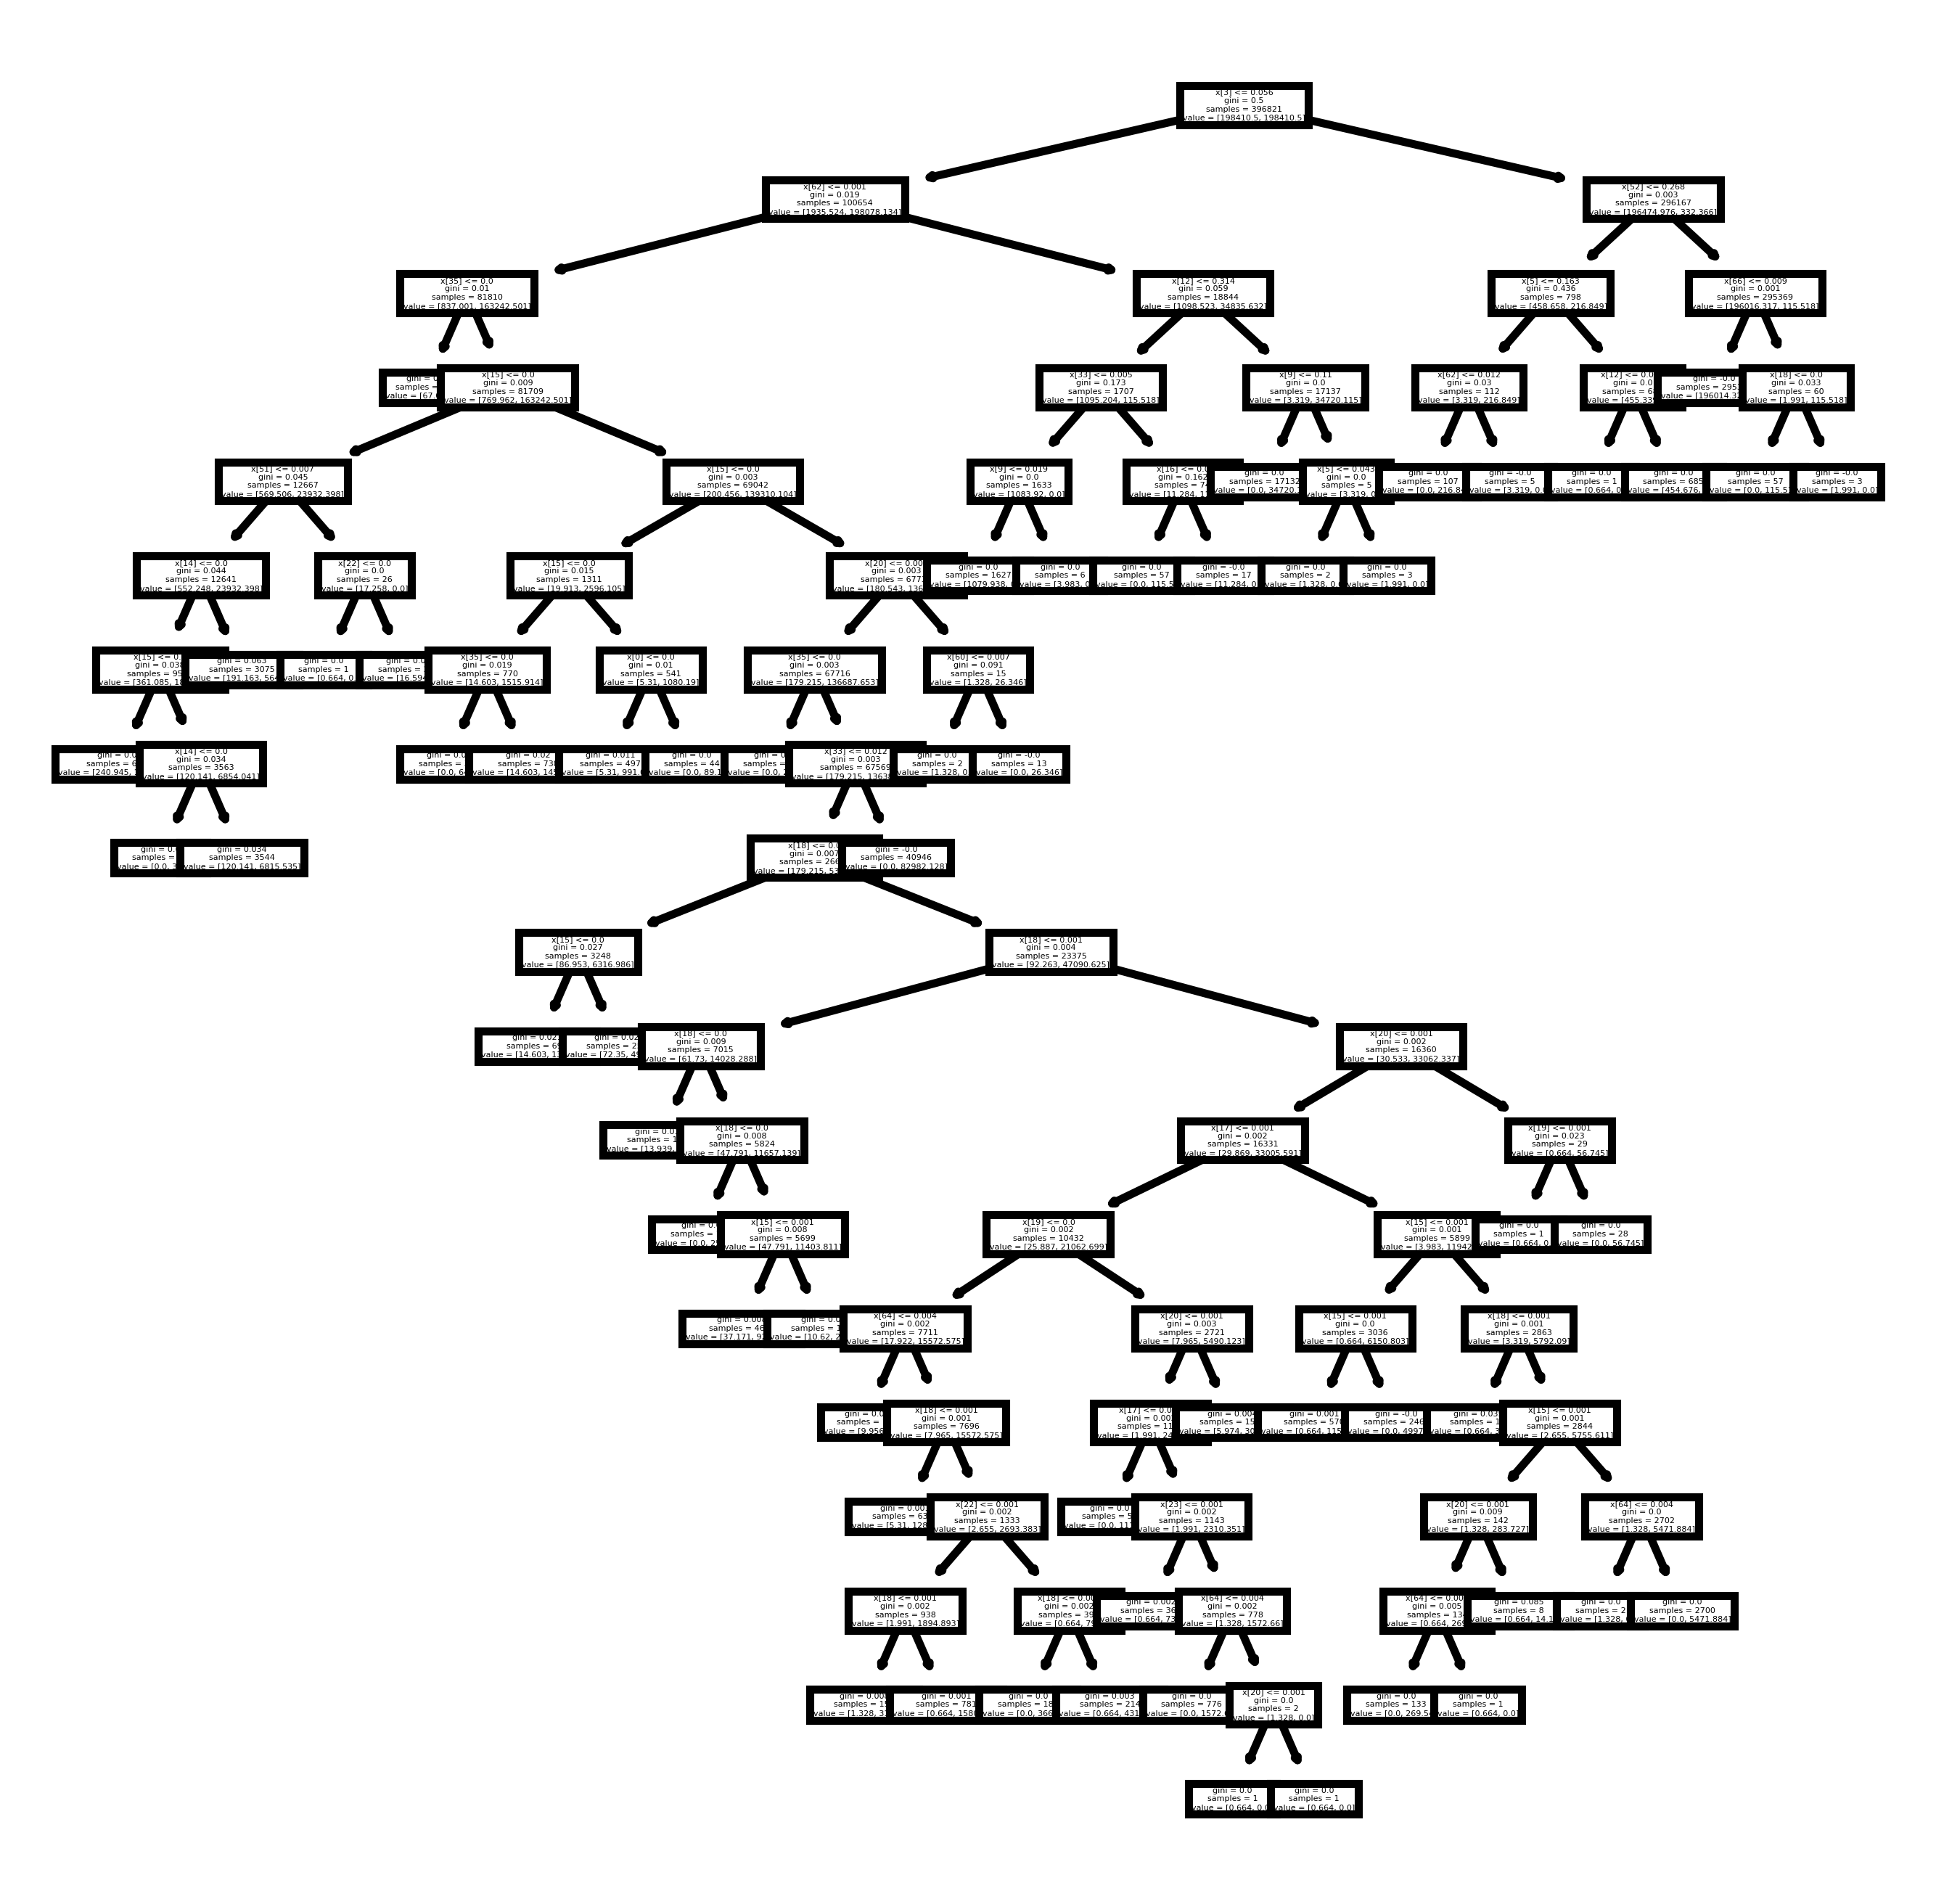

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 800)
tree.plot_tree(model.estimators_[0])